#### Problem Statement

Avocado is a fruit consumed by people heavily in the United States. 

Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation</br>
AveragePrice - the average price of a single avocado</br>
type - conventional or organic</br>
year - the year</br>
Region - the city or region of the observation</br>
Total Volume - Total number of avocados sold</br>
4046 - Total number of avocados with PLU 4046 sold</br>
4225 - Total number of avocados with PLU 4225 sold</br>
4770 - Total number of avocados with PLU 4770 sold</br>


Inspiration /Label 

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

Do both tasks in the same .ipynb file and submit at single file. 

To download the dataset, use the link given below. 

Downlaod Files:
https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/avocado.csv.zip

#### Importing Libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

from scipy.stats import zscore

from sklearn.model_selection import train_test_split

#Classification Model
from sklearn.linear_model import LogisticRegression
from sklearn.svm  import SVC
svc = SVC()
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier()
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

#Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()
from sklearn.svm import SVR
SV = SVR()
from sklearn.metrics import r2_score


from sklearn.ensemble import RandomForestRegressor


# from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

import warnings
warnings.filterwarnings('ignore')

In [3]:
url = 'https://raw.githubusercontent.com/MrTanbirSingh/FlipRoBoInternship/main/avocado.csv'

In [4]:
df_backup = pd.DataFrame(pd.read_csv(url))

In [5]:
df = df_backup.drop('Unnamed: 0', axis = 1).copy()

### **Understanding Data**

#### Size of the Data

In [6]:
df.shape

(18249, 13)

#### How data looks like


In [7]:
df.sample(5)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2055,2015-06-21,1.05,135895.47,51621.94,47601.83,73.18,36598.52,36598.52,0.00,0.00,conventional,2015,Roanoke
5501,2016-03-13,0.93,36374516.14,11661687.44,13104887.66,1800065.57,9807875.47,7231162.60,2521123.87,55589.00,conventional,2016,TotalUS
9607,2015-09-27,1.46,10508.73,329.58,9461.16,0.00,717.99,96.67,621.32,0.00,organic,2015,CincinnatiDayton
7841,2017-01-01,0.93,560310.35,149666.20,206181.12,15014.45,189448.58,150517.04,37802.65,1128.89,conventional,2017,SanDiego
2446,2015-12-13,0.99,67431.18,22229.24,20738.68,2189.59,22273.67,22269.39,4.28,0.00,conventional,2015,Spokane


#### What is the data type of columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


Converting Date Dtype from object to the data

In [9]:
df.Date = pd.to_datetime(df['Date'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 1.8+ MB


In [11]:
df.sample(2)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
12760,2016-01-31,1.45,89574.32,8791.51,58433.15,0.00,22349.66,6581.99,15767.67,0.0,organic,2016,GreatLakes
6621,2017-01-08,0.57,1417208.02,933181.79,198434.84,2690.98,282900.41,190479.48,92420.93,0.0,conventional,2017,Houston


#### Checking null values

In [12]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

NO Null data in this data set

#### How does the data look mathematically

In [13]:
df.describe(include=['O'])

,type,region
count,18249,18249
unique,2,54
top,conventional,Albany
freq,9126,338


**categorical data**

In [14]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


**Numerical data**

#### Label encoding 

In [15]:
df.insert(df.columns.get_loc('region')+1, column= 'LE_region', value=le.fit_transform(df['region']))

In [16]:
df.insert(df.columns.get_loc('type')+1, column= 'LE_type', value=le.fit_transform(df['type']))

In [17]:
df.sample(5)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,LE_type,year,region,LE_region
3924,2016-07-10,1.00,357786.69,153905.64,69545.22,7716.52,126619.31,78101.14,47342.89,1175.28,conventional,0,2016,LasVegas,21
8461,2017-04-23,0.75,1108328.51,583229.86,105373.50,13999.44,405725.71,118216.19,287509.52,0.00,conventional,0,2017,WestTexNewMexico,53
939,2015-12-06,0.74,989676.85,368528.91,490805.00,7041.19,123301.75,61020.31,62281.44,0.00,conventional,0,2015,Houston,18
18087,2018-02-11,1.87,7802.04,2208.31,3192.62,0.00,2401.11,2401.11,0.00,0.00,organic,1,2018,Sacramento,40
2689,2015-04-12,1.02,32046401.64,14793354.18,11210544.11,807942.41,5234560.94,4400469.38,826567.05,7524.51,conventional,0,2015,TotalUS,51


#### Checking for Duplicate values

In [18]:
df.duplicated().sum()

0

#### How is the correlation between columns

In [19]:
df.corr()['AveragePrice'].sort_values(ascending = False)

AveragePrice    1.000000
LE_type         0.615845
year            0.093197
LE_region      -0.011716
XLarge Bags    -0.117592
4225           -0.172928
Large Bags     -0.172940
Small Bags     -0.174730
Total Bags     -0.177088
4770           -0.179446
Total Volume   -0.192752
4046           -0.208317
Name: AveragePrice, dtype: float64

### Exploratory Data Analysis

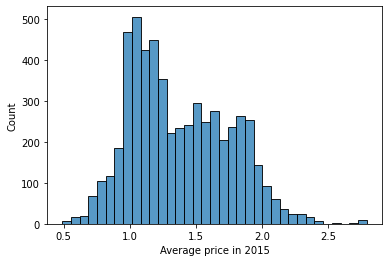

Max Price:  2.79 
Mean Price:  1.3755903829029397 
Min Price:  0.49


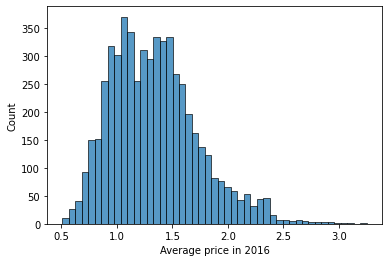

Max Price:  3.25 
Mean Price:  1.3386396011395996 
Min Price:  0.51


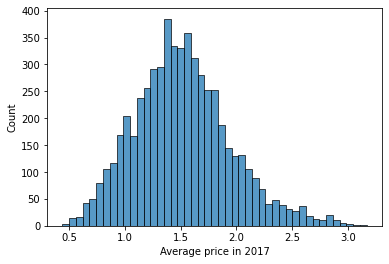

Max Price:  3.17 
Mean Price:  1.515127577770011 
Min Price:  0.44


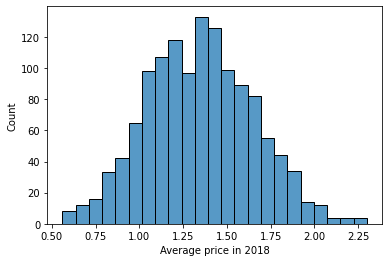

Max Price:  2.3 
Mean Price:  1.347530864197531 
Min Price:  0.56


In [20]:
for year in df['year'].unique():
  sns.histplot(df[df["year"] == year ]['AveragePrice'])
  plt.xlabel(f'Average price in {year}')
  plt.show()
  print('Max Price: ',df[df["year"] == year ]['AveragePrice'].max(),
        '\nMean Price: ',df[df["year"] == year ]['AveragePrice'].mean(),
        '\nMin Price: ',df[df["year"] == year ]['AveragePrice'].min())

In [21]:
df.sample(5)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,LE_type,year,region,LE_region
10772,2015-05-03,1.82,2498.36,1559.49,48.87,0.00,890.00,890.00,0.00,0.00,organic,1,2015,Orlando,31
15271,2017-12-31,1.14,15852.37,446.28,1042.43,0.00,14363.66,13142.03,1221.63,0.00,organic,1,2017,Columbus,10
9210,2015-05-17,1.78,5157.67,2076.48,2105.43,0.00,975.76,122.05,853.71,0.00,organic,1,2015,Atlanta,1
7277,2017-08-27,1.57,296756.62,189042.09,27713.25,101.45,79899.83,46809.61,27371.33,5718.89,conventional,0,2017,Orlando,31
3596,2016-10-30,1.36,2275351.91,456451.30,955805.27,88514.18,774581.16,433158.18,335025.88,6397.10,conventional,0,2016,GreatLakes,15


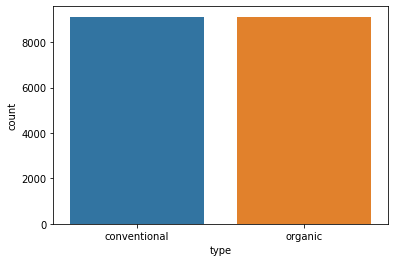

In [22]:
sns.countplot(df['type'])

In [23]:
df[df['AveragePrice'] >= 2.5].region.value_counts()

SanFrancisco           54
Spokane                17
Seattle                16
HartfordSpringfield    15
RaleighGreensboro      14
Charlotte              10
Portland               10
Boise                   9
Sacramento              8
Atlanta                 7
LasVegas                6
WestTexNewMexico        5
BuffaloRochester        5
StLouis                 5
SanDiego                4
Jacksonville            4
MiamiFtLauderdale       4
Tampa                   4
Orlando                 3
California              2
PhoenixTucson           2
GrandRapids             2
West                    2
NewYork                 1
Name: region, dtype: int64

In [24]:
for region in df.region.unique():
  print(f'{region}: ',df[df['region'] == region]['AveragePrice'].mean())

Albany:  1.5610355029585792
Atlanta:  1.3379585798816571
BaltimoreWashington:  1.5342307692307684
Boise:  1.348136094674556
Boston:  1.5308875739644972
BuffaloRochester:  1.5168343195266274
California:  1.3953254437869818
Charlotte:  1.6060355029585796
Chicago:  1.5567751479289942
CincinnatiDayton:  1.2092011834319527
Columbus:  1.2527810650887576
DallasFtWorth:  1.0855917159763315
Denver:  1.2185798816568048
Detroit:  1.2760946745562132
GrandRapids:  1.5049999999999992
GreatLakes:  1.3385502958579882
HarrisburgScranton:  1.5132840236686393
HartfordSpringfield:  1.8186390532544363
Houston:  1.0479289940828398
Indianapolis:  1.313994082840236
Jacksonville:  1.5109467455621308
LasVegas:  1.3809171597633145
LosAngeles:  1.216005917159763
Louisville:  1.286686390532545
MiamiFtLauderdale:  1.428491124260355
Midsouth:  1.4047633136094666
Nashville:  1.2121005917159768
NewOrleansMobile:  1.3047928994082851
NewYork:  1.727573964497041
Northeast:  1.6019230769230774
NorthernNewEngland:  1.47739

Average prices based on the region

In [25]:
df[df['Total Volume'] >= df['Total Volume'].quantile(.95)]['region'].value_counts()

SouthCentral    169
TotalUS         169
West            169
California      167
Northeast       112
Southeast        59
GreatLakes       46
LosAngeles       11
Midsouth         11
Name: region, dtype: int64

In [26]:
df.sample(2)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,LE_type,year,region,LE_region
8549,2018-01-07,1.28,161876.76,8645.30,92302.56,56.67,60872.23,12248.04,48624.19,0.0,conventional,0,2018,BuffaloRochester,5
2822,2016-09-18,1.39,79513.63,6624.37,63384.56,37.48,9467.22,8958.14,509.08,0.0,conventional,0,2016,Albany,0


### Spliting Numerical data

In [27]:
numerical_data = []
categorical_data = []

for i in df.columns:
  if np.dtype(df[i]) != np.dtype('O'):
    numerical_data.append(i)
  else:
    categorical_data.append(i)

In [28]:
numerical = numerical_data[1:]
numerical

['AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'LE_type',
 'year',
 'LE_region']

In [29]:
df_num = df[[numerical][0]]

In [30]:
df_num.sample(5)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,LE_type,year,LE_region
10780,1.75,2782.53,1382.97,52.89,0.00,1346.67,1346.67,0.00,0.00,1,2015,31
15380,1.67,24471.73,4093.04,451.74,49.81,19877.14,19803.55,73.59,0.00,1,2017,12
1196,1.04,61654.94,1377.63,37760.21,3204.01,19313.09,11289.80,7288.66,734.63,0,2015,23
2838,1.49,127812.25,2580.77,104876.94,103.64,20250.90,19519.92,180.98,550.00,0,2016,0
4135,1.16,3304967.62,674982.83,1530425.54,230513.77,869045.48,750464.94,81187.92,37392.62,0,2016,25


### checking outlier

In [31]:
x = df.drop(['AveragePrice','Date','type','region'],axis = 1)
x = pd.DataFrame(power_transform(x),columns = x.columns)
# for columns in df.columns:
#   sns.boxenplot(df[columns])

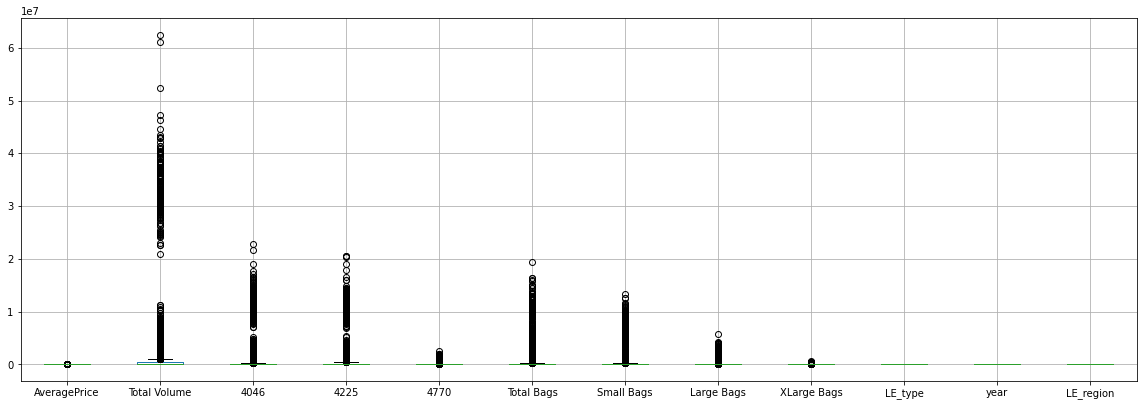

In [32]:
df.iloc[:].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [33]:
z = np.abs(zscore(df_num))
threshold = 3
df_new  = df_num[(z<2.5).all(axis=1)]

In [34]:
print(df_num.shape)

(18249, 12)


In [35]:
print(df_new.shape)

(17341, 12)


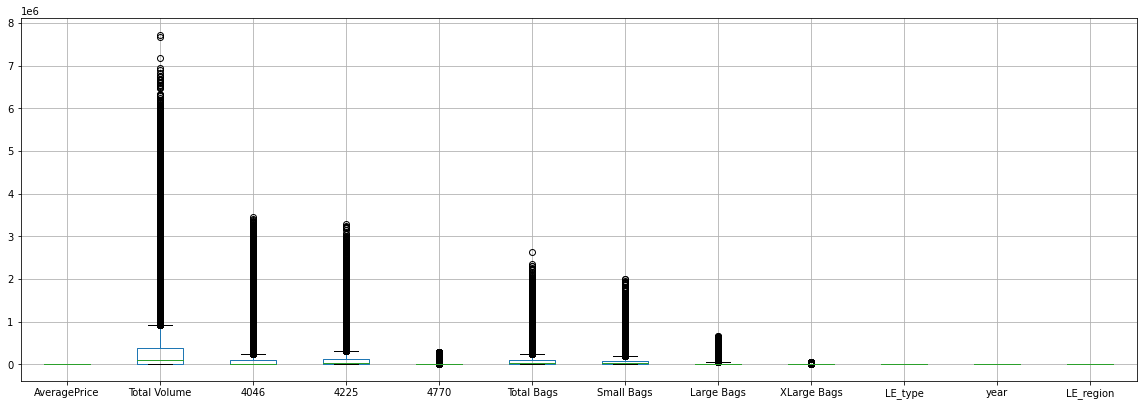

In [36]:
df_new.iloc[:].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

Data is lost after removing outliers.


In [37]:
(18249-17341)/18249*100

4.975615102197381

### Checking Skewness

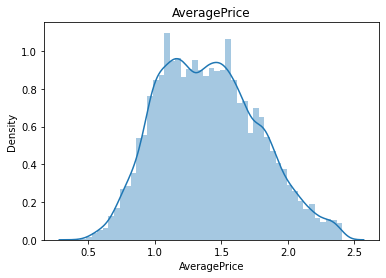

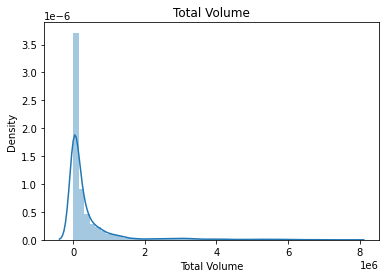

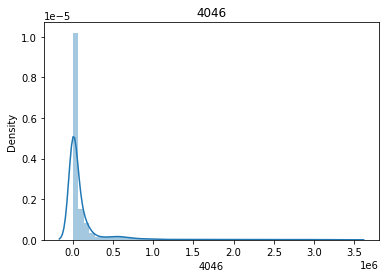

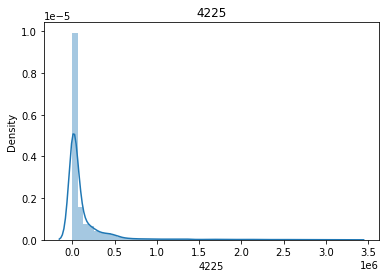

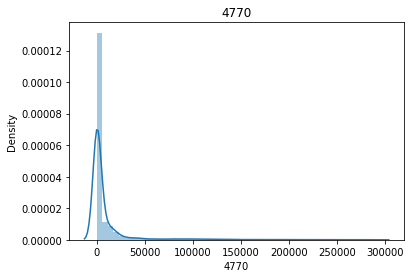

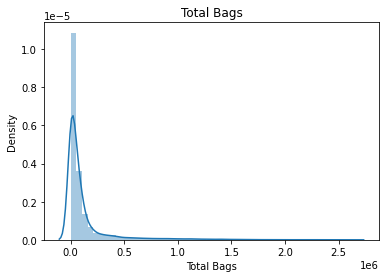

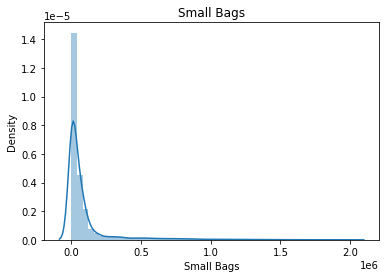

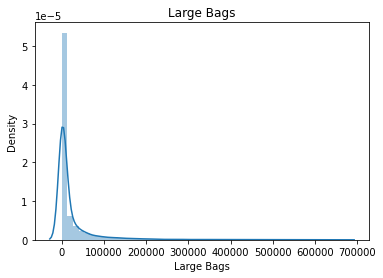

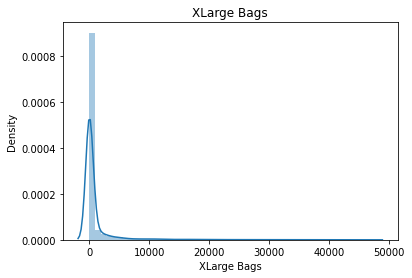

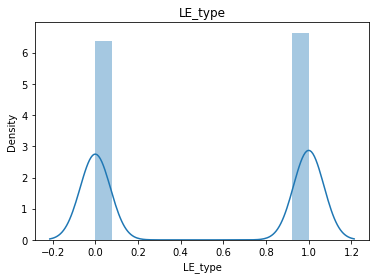

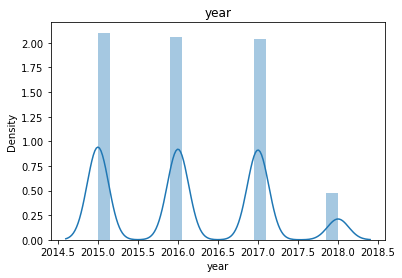

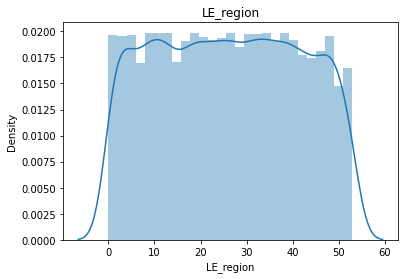

In [38]:
for i in df.columns:
  try:
    sns.distplot(df_new[i])
    plt.title(i)
    plt.show()
  except:
    pass

Skewness is present in the data

## Regression Model

### Spliting Data

In [39]:
X = df_new.drop(['AveragePrice'],axis=1)
y = df_new['AveragePrice']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 42)

In [41]:
lr = LinearRegression()
lr.fit(X_train, y_train)

pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)

print(lr.score(X_train, y_train))

print(r2_score(y_test, pred_test))
print('\nMean Squared Error: ', mean_squared_error(y_test,pred_test), '\nMean absolute Error: ', mean_absolute_error(y_test,pred_test))

0.4084239599946555
0.4148322426970339

Mean Squared Error:  0.0832471384856938 
Mean absolute Error:  0.22720594397124802


In [42]:
SV.fit(X_train, y_train)

pred_train = SV.predict(X_train)
pred_test = SV.predict(X_test)

print(SV.score(X_train, y_train))

print(r2_score(y_test, pred_test))


r2_score(y_test, pred_test)
print('\nMean Squared Error: ', mean_squared_error(y_test,pred_test), '\nMean absolute Error: ', mean_absolute_error(y_test,pred_test))

0.4274246379907961
0.4211339173273434

Mean Squared Error:  0.08235064961717 
Mean absolute Error:  0.22216055518393013


In [43]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
max_acc = 0
max_rs = 0
for i in range(10,200):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = i)
  rdr.fit(X_train,y_train)
  pred=rdr.predict(X_test)
  score = rdr.score(X_train, y_train)
  
  if score > max_acc:
    max_acc = score
    max_rs = i
print(rdr.score(X_train, y_train))
print(r2_score(y_test, pred),'Random State:',max_rs)
print('MAE:', mean_absolute_error(y_test, pred))
print('MSE:', mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred)))

0.9772621718678874
0.8507193084975879 Random State: 44
MAE: 0.10410515998846931
MSE: 0.021220914240415105
RMSE: 0.1456739998778612


Rainforest is working better than the other models


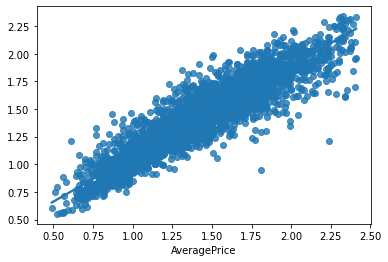

In [44]:
sns.regplot(x = y_test, y = pred)

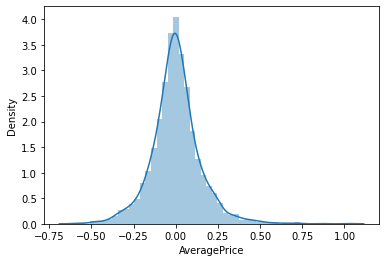

In [45]:
sns.distplot(y_test-pred,bins=50)

residual is normally distributed


## Classification Model

### Spliting Data

In [46]:
X = df_new.drop(['LE_region'],axis=1)
y = df_new.iloc[:,-1:]

lg = LogisticRegression()


In [47]:
max_acc = 0
max_rs = 0
# for i in range(10,50):
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 43)
lg.fit(X_train,y_train)
pred=lg.predict(X_test)
score = accuracy_score(y_test, pred)

  # if score > max_acc:
  #   max_acc = score
  #   max_rs = i

print(score)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))



0.1697895647160565
[[ 0  0  1 ...  0  0  0]
 [ 0  8  0 ...  3  1  4]
 [ 0  0 29 ...  1  0  0]
 ...
 [ 0  0  0 ... 21  4  0]
 [ 0  0  0 ... 11 21  0]
 [ 0  0  2 ...  3  5  7]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        71
           1       0.25      0.10      0.15        78
           2       0.38      0.49      0.43        59
           3       0.00      0.00      0.00        74
           4       0.23      0.18      0.20        66
           5       0.07      0.25      0.12        72
           6       0.17      0.38      0.24        50
           7       0.36      0.06      0.10        69
           8       0.87      0.47      0.61        72
           9       0.19      0.74      0.30        84
          10       0.00      0.00      0.00        63
          11       0.07      0.02      0.03        54
          12       0.31      0.47      0.37        68
          13       0.42      0.38      0.40        86
          14  

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 43)
svc.fit(X_train,y_train)
pred=svc.predict(X_test)
score = accuracy_score(y_test, pred)

print(score)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))


0.24618045546266937
[[ 9  0  0 ...  0  0  0]
 [ 0 21  0 ...  0  0  1]
 [ 0  0 27 ...  0  0  0]
 ...
 [ 0  0  0 ... 17  0  0]
 [ 0  0  0 ...  0 19  0]
 [ 0  0  0 ...  0  0 27]]
              precision    recall  f1-score   support

           0       0.64      0.13      0.21        71
           1       0.64      0.27      0.38        78
           2       0.90      0.46      0.61        59
           3       0.00      0.00      0.00        74
           4       0.81      0.38      0.52        66
           5       0.00      0.00      0.00        72
           6       0.68      0.30      0.42        50
           7       0.00      0.00      0.00        69
           8       0.97      0.49      0.65        72
           9       0.60      0.31      0.41        84
          10       0.24      0.16      0.19        63
          11       0.67      0.33      0.44        54
          12       0.74      0.34      0.46        68
          13       0.53      0.27      0.36        86
          14 

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 43)
dc.fit(X_train,y_train)
pred=dc.predict(X_test)
score = accuracy_score(y_test, pred)
score

print(score)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.7927356586912655
[[55  0  0 ...  0  0  0]
 [ 0 56  0 ...  0  0  0]
 [ 0  0 52 ...  0  0  1]
 ...
 [ 0  0  0 ... 28  0  0]
 [ 0  0  0 ...  0 51  0]
 [ 0  1  1 ...  0  0 51]]
              precision    recall  f1-score   support

           0       0.76      0.77      0.77        71
           1       0.77      0.72      0.74        78
           2       0.84      0.88      0.86        59
           3       0.79      0.78      0.79        74
           4       0.78      0.86      0.82        66
           5       0.80      0.74      0.77        72
           6       0.96      0.86      0.91        50
           7       0.81      0.78      0.79        69
           8       0.95      0.97      0.96        72
           9       0.82      0.77      0.80        84
          10       0.57      0.62      0.60        63
          11       0.79      0.93      0.85        54
          12       0.83      0.78      0.80        68
          13       0.77      0.74      0.76        86
          14  

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 43)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
score = accuracy_score(y_test, pred)

print(score)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))


0.6503315076390891
[[55  0  0 ...  0  0  0]
 [ 0 50  0 ...  0  0  2]
 [ 0  2 42 ...  0  0  0]
 ...
 [ 0  0  0 ... 26  0  0]
 [ 0  0  0 ...  0 41  0]
 [ 0  1  0 ...  0  0 38]]
              precision    recall  f1-score   support

           0       0.57      0.77      0.65        71
           1       0.71      0.64      0.68        78
           2       0.61      0.71      0.66        59
           3       0.79      0.78      0.79        74
           4       0.70      0.86      0.78        66
           5       0.56      0.49      0.52        72
           6       0.75      0.72      0.73        50
           7       0.60      0.83      0.70        69
           8       0.83      0.83      0.83        72
           9       0.63      0.67      0.65        84
          10       0.51      0.65      0.57        63
          11       0.56      0.74      0.63        54
          12       0.76      0.62      0.68        68
          13       0.75      0.70      0.72        86
          14  

Decision Tree score is the highest among other classification models

### Saving Classification Model

In [51]:
#Lets save the model using joblib and pickle
import joblib
import pickle
joblib.dump(dc, 'baseball.obj')
pickle.dump(dc,open('baseball.pkl','wb'))